In [1]:
!pip install ISLP

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
from ISLP import load_data
Auto = load_data('Auto')
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [27]:
median_mpg = Auto['mpg'].agg('median')

Auto['mpg01'] = (Auto['mpg'] > median_mpg).astype(int)

Auto['mpg01'].head()

name
chevrolet chevelle malibu    0
buick skylark 320            0
plymouth satellite           0
amc rebel sst                0
ford torino                  0
Name: mpg01, dtype: int32

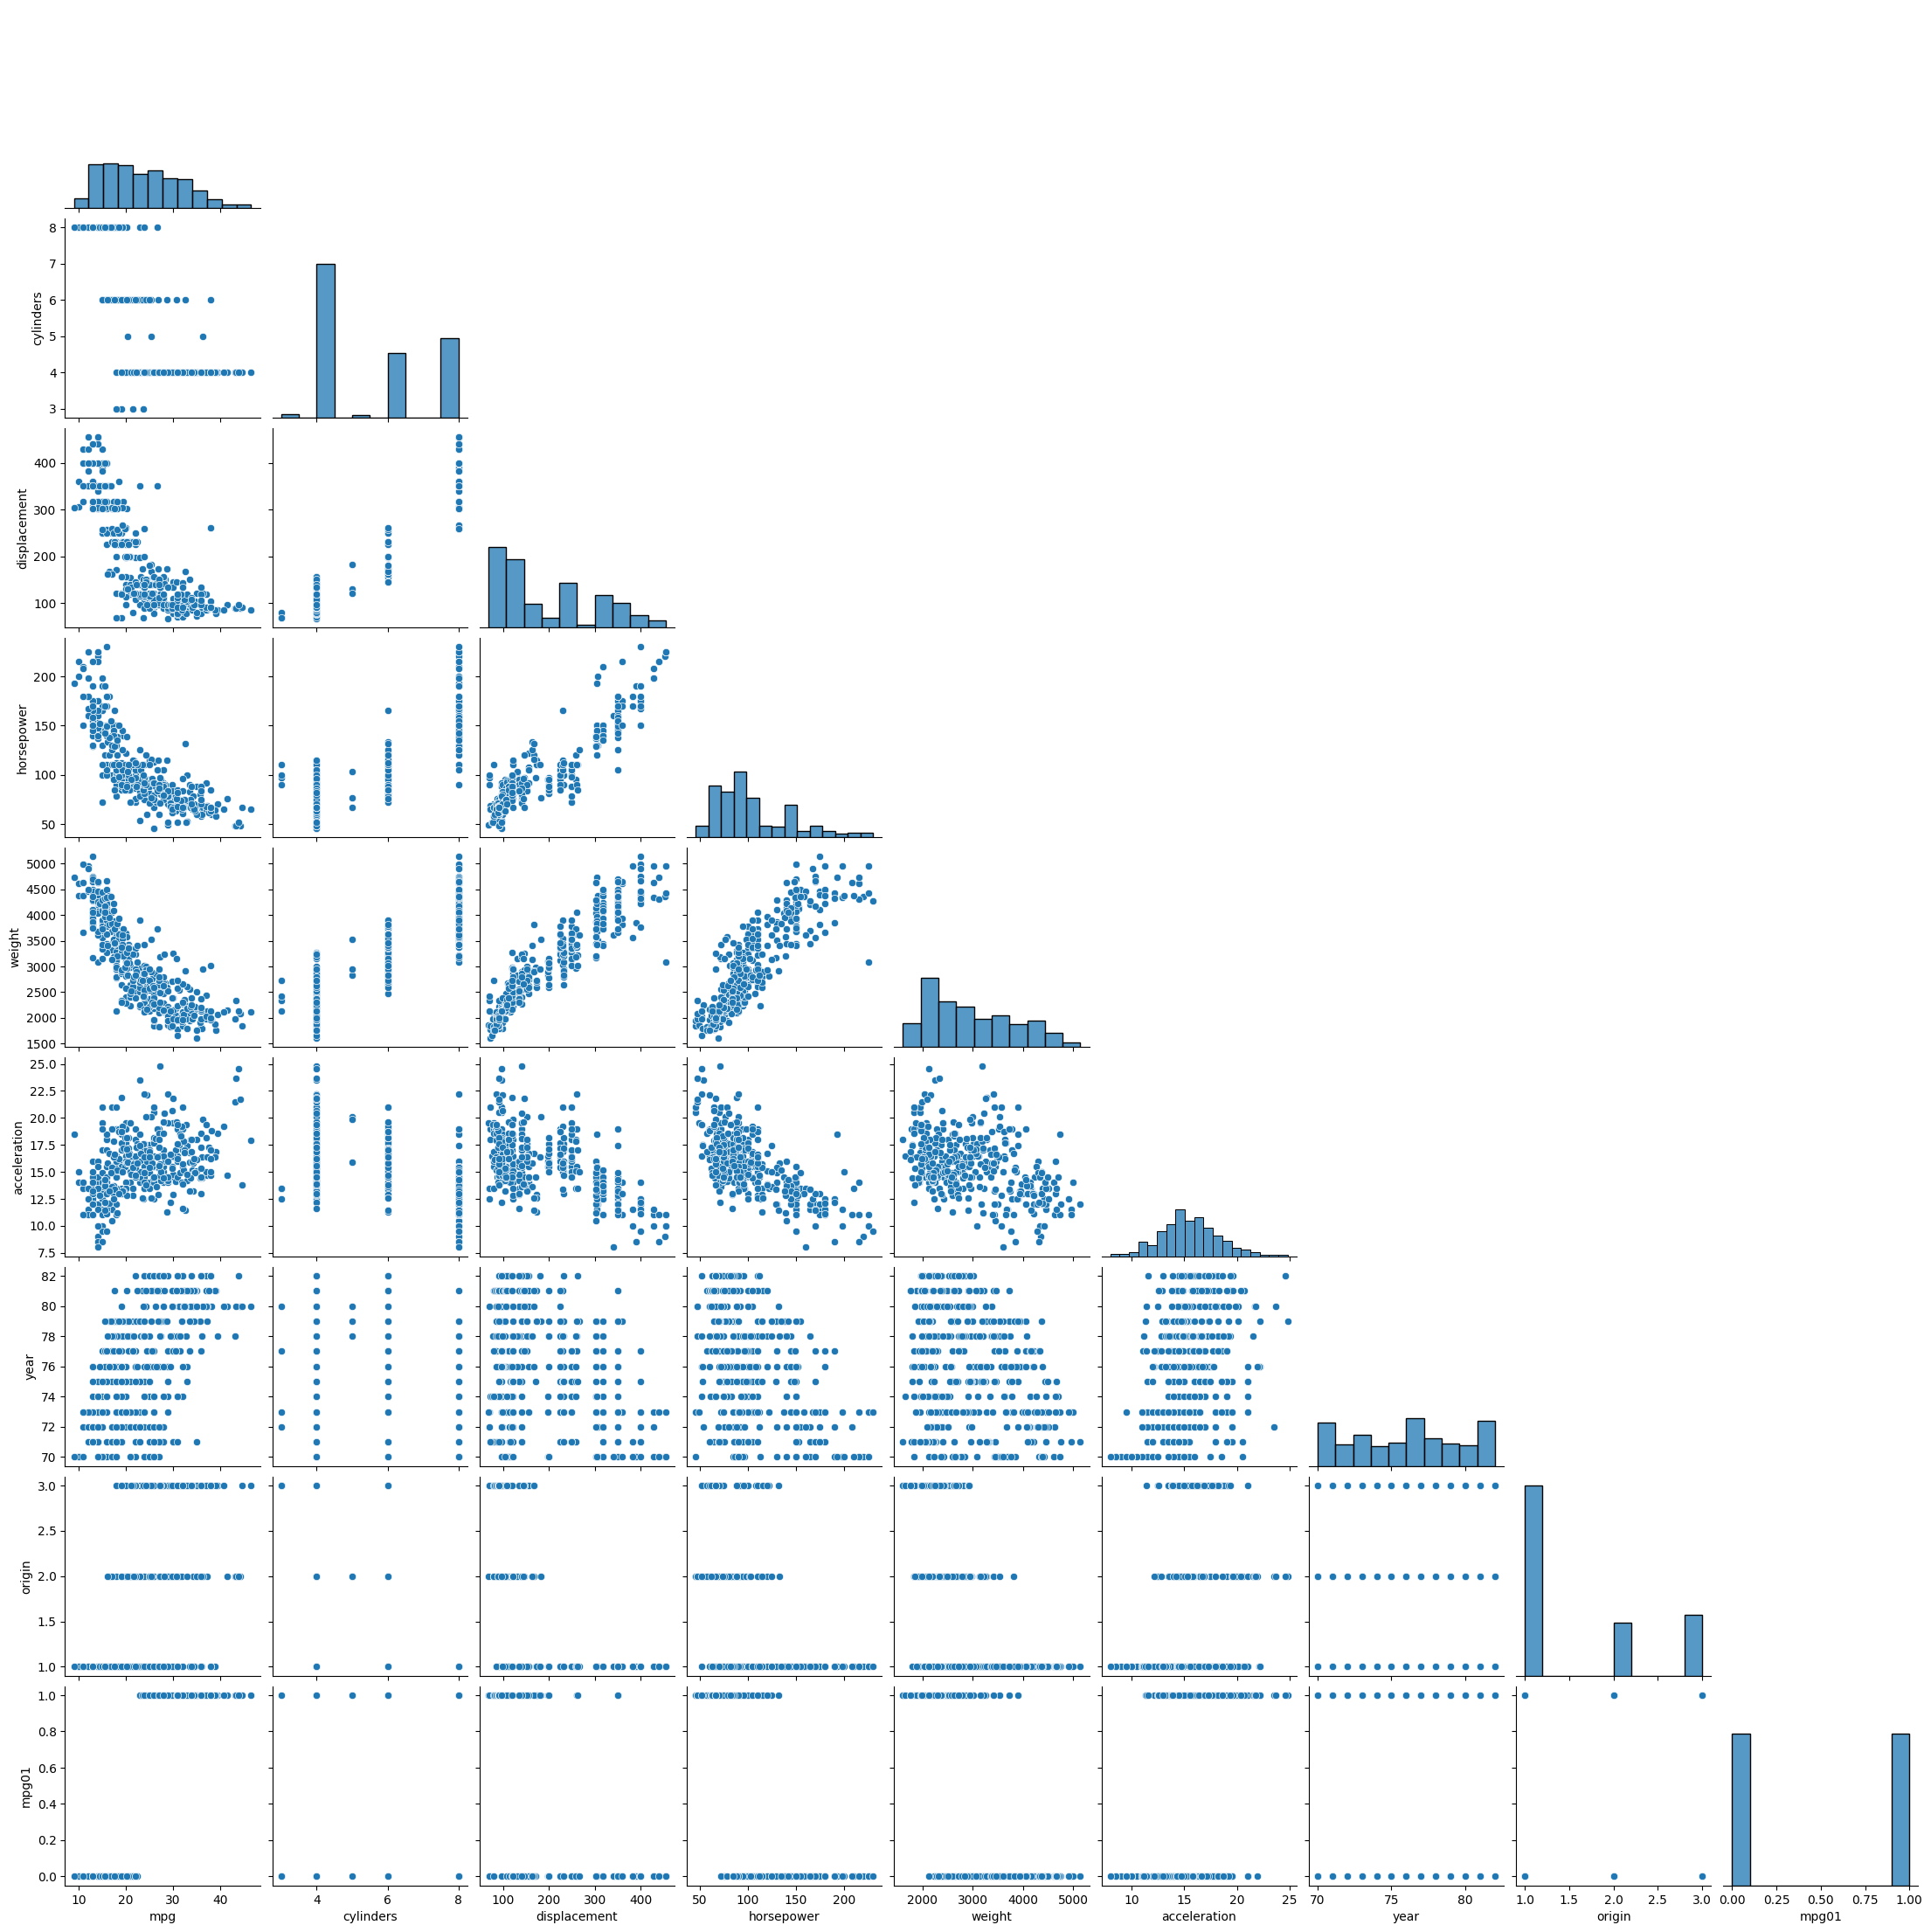

In [5]:
sns.pairplot(Auto, corner=True)

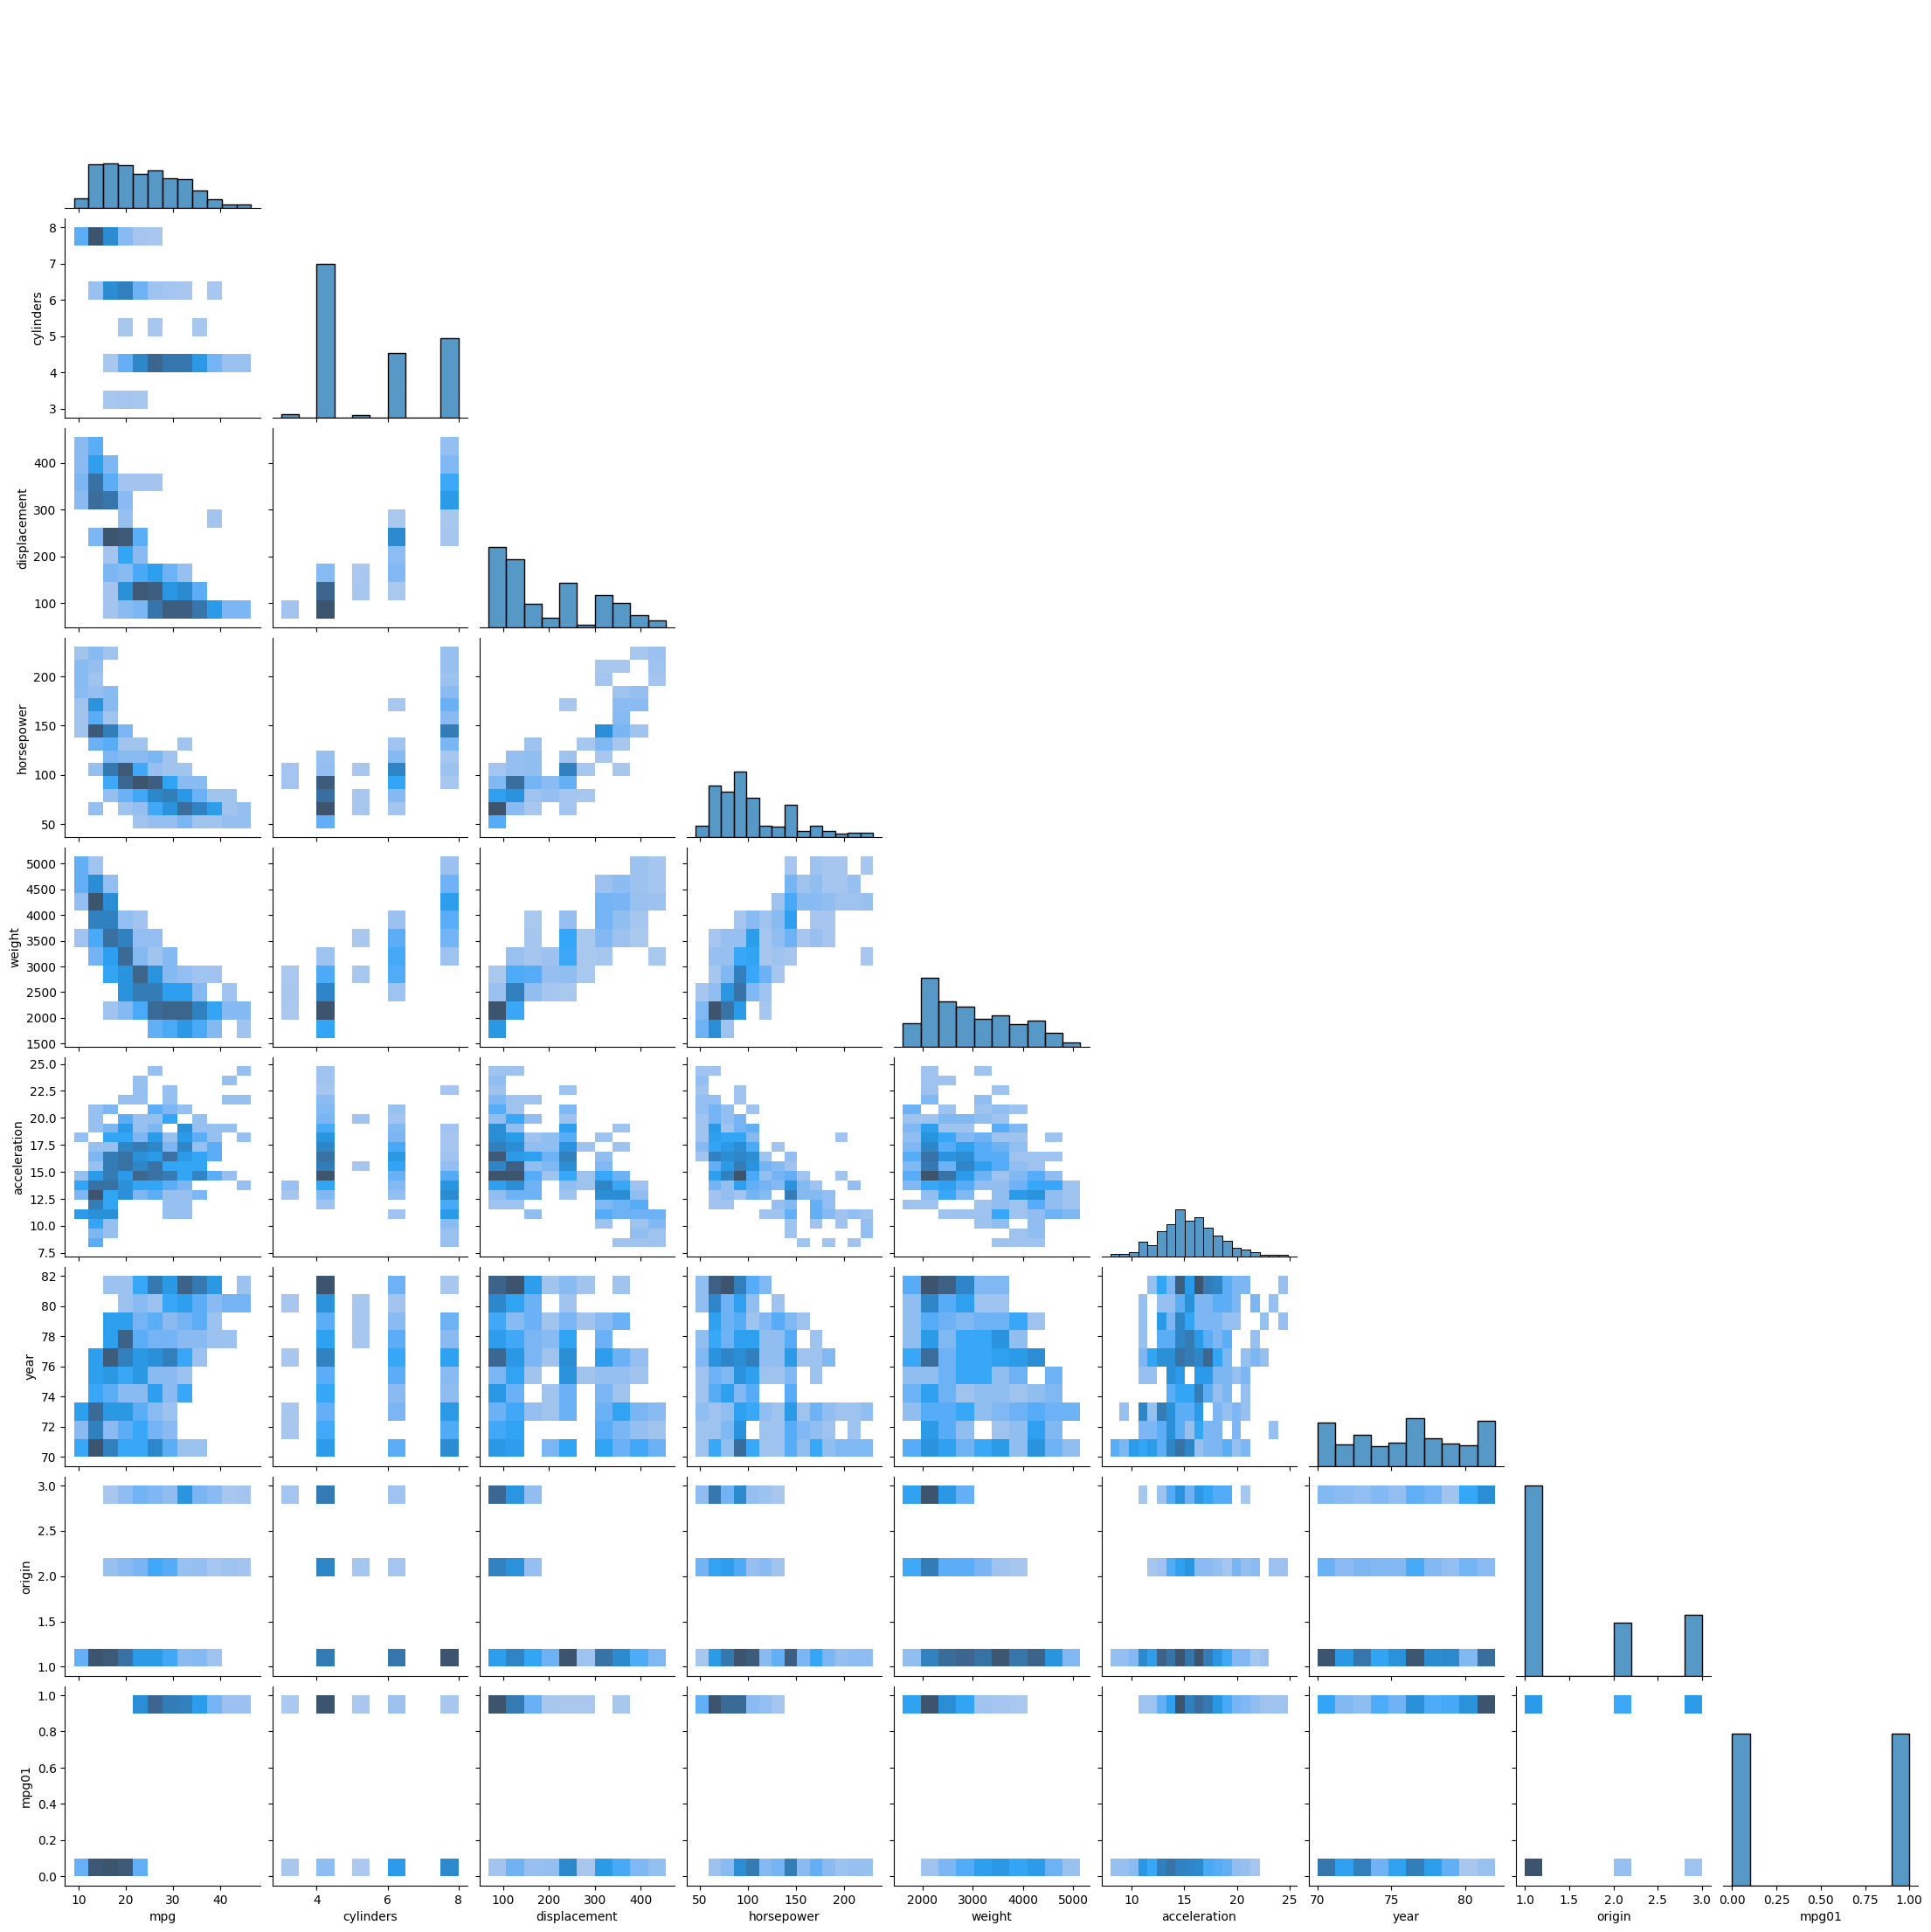

In [6]:
sns.pairplot(Auto, corner=True, kind="hist")

lower values of cylinders, displacement, horsepower and weight seem to be related to high mpg
lower acceleration, year and origin seem to be related to lower mpg

In [31]:
print(Auto.shape[0])

rand_Auto = Auto.sample(frac = 1, random_state = 10)

test_set = rand_Auto.iloc[0:Auto.shape[0]//4]
train_set = rand_Auto.iloc[Auto.shape[0]//4:]

train_set


392


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
name,,,,,,,,,
dodge aspen,18.6,6,225.0,110,3620,18.7,78,1,0
datsun pl510,27.0,4,97.0,88,2130,14.5,71,3,1
datsun b-210,32.0,4,85.0,70,1990,17.0,76,3,1
honda civic,24.0,4,120.0,97,2489,15.0,74,3,1
mazda rx2 coupe,19.0,3,70.0,97,2330,13.5,72,3,0
...,...,...,...,...,...,...,...,...,...
volkswagen rabbit l,36.0,4,105.0,74,1980,15.3,82,2,1
mazda glc,46.6,4,86.0,65,2110,17.9,80,3,1
plymouth duster,22.0,6,198.0,95,2833,15.5,70,1,0


In [59]:
import numpy as np  # type: ignore
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis # type: ignore
from sklearn.linear_model import LogisticRegression # type: ignore
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [43]:
X_train = train_set[['cylinders', 'displacement', 'horsepower' , 'weight', 'acceleration', 'year' , 'origin']]
y_train = train_set[['mpg01']]

X_test = test_set[['cylinders', 'displacement', 'horsepower' , 'weight', 'acceleration', 'year' , 'origin']]
y_test = test_set[['mpg01']]


estimator = LinearDiscriminantAnalysis(shrinkage=None) 
estimator.fit(X_train, y_train) 
  
# Obtain predictions for the test set 
y_pred = estimator.predict(X_test) 
  
# Print the classification accuracy 
print(estimator.score(X_test, y_test)) 

0.8775510204081632


c:\Users\PERFECT SOLUTION\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
estimator = QuadraticDiscriminantAnalysis() 
estimator.fit(X_train, y_train) 
  
# Obtain predictions for the test set 
y_pred = estimator.predict(X_test) 
  
# Print the classification accuracy 
print(estimator.score(X_test, y_test)) 

0.8877551020408163


c:\Users\PERFECT SOLUTION\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
estimator = LogisticRegression(max_iter=1000) 
estimator.fit(X_train, y_train) 
  
# Obtain predictions for the test set 
y_pred = estimator.predict(X_test) 
  
# Print the classification accuracy 
print(estimator.score(X_test, y_test)) 

0.8979591836734694


c:\Users\PERFECT SOLUTION\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [56]:
estimator = GaussianNB() 
estimator.fit(X_train, y_train) 
  
# Obtain predictions for the test set 
y_pred = estimator.predict(X_test) 
  
# Print the classification accuracy 
print(estimator.score(X_test, y_test)) 

0.8877551020408163


c:\Users\PERFECT SOLUTION\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
n_neighbors = [1,5,10,20,50,100,150, 200, 250, 294]

for i in n_neighbors:
    estimator = KNeighborsClassifier(n_neighbors=i) 
    estimator.fit(X_train, y_train) 
    
    # Obtain predictions for the test set 
    y_pred = estimator.predict(X_test) 
    
    # Print the classification accuracy 
    print(i,"-neighbours",estimator.score(X_test, y_test)) 

1 -neighbours 0.826530612244898
5 -neighbours 0.8775510204081632
10 -neighbours 0.8877551020408163
20 -neighbours 0.8673469387755102
50 -neighbours 0.8775510204081632
100 -neighbours 0.8775510204081632
150 -neighbours 0.8673469387755102
200 -neighbours 0.8469387755102041
250 -neighbours 0.7959183673469388
294 -neighbours 0.41836734693877553


c:\Users\PERFECT SOLUTION\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\PERFECT SOLUTION\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\PERFECT SOLUTION\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\PERFECT SOLUTION\AppData\Local\Programs\Python\Python312\Lib\site-package